## 구직자 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('장애인취업정보.csv', encoding='euc-kr')

In [3]:
df['근무지역'] = df['근무지역'].str[:2]
df = df.dropna()

In [4]:
df

,순번,취업일자,연령,장애유형,중증여부,근무지역,취업직종대분류
0,1.0,2022-06-01,26.0,정신장애,중증,경기,경영·행정·사무직
1,2.0,2022-01-01,28.0,지적장애,중증,충북,경영·행정·사무직
2,3.0,2022-01-01,19.0,지적장애,중증,충북,경영·행정·사무직
3,4.0,2022-01-01,22.0,지적장애,중증,충북,경영·행정·사무직
4,5.0,2022-01-01,23.0,지적장애,중증,충북,경영·행정·사무직
...,...,...,...,...,...,...,...
45112,45113.0,2022-12-02,72.0,지체장애,경증,강원,청소 및 기타 개인서비스직
45113,45114.0,2022-12-19,24.0,지체장애,경증,경기,정보통신 연구개발직 및 공학기술직
45114,45115.0,2022-03-21,67.0,지체장애,중증,경기,제조 단순직
45115,45116.0,2022-09-15,28.0,시각장애,경증,대구,경영·행정·사무직


## ml_df 설정

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
ml_df = df[['연령', '장애유형', '중증여부', '근무지역','취업직종대분류']].copy()

In [9]:
ml_df

,연령,장애유형,중증여부,근무지역,취업직종대분류
0,26.0,정신장애,중증,경기,경영·행정·사무직
1,28.0,지적장애,중증,충북,경영·행정·사무직
2,19.0,지적장애,중증,충북,경영·행정·사무직
3,22.0,지적장애,중증,충북,경영·행정·사무직
4,23.0,지적장애,중증,충북,경영·행정·사무직
...,...,...,...,...,...
45112,72.0,지체장애,경증,강원,청소 및 기타 개인서비스직
45113,24.0,지체장애,경증,경기,정보통신 연구개발직 및 공학기술직
45114,67.0,지체장애,중증,경기,제조 단순직
45115,28.0,시각장애,경증,대구,경영·행정·사무직


# 연아_AUTOML

In [5]:
#!pip install pycaret --quiet
#!pip install shap --quiet
#pip install --upgrade pycaret

In [21]:
unique_labels = ml_df['취업직종대분류'].unique()
print(unique_labels)

['경영·행정·사무직' '청소 및 기타 개인서비스직' '돌봄 서비스직(간병·육아)' '인쇄·목재·공예 및 기타 설치·정비·생산직'
 '제조 단순직' '보건·의료직' '경호·경비직' '금융·보험직' '전기·전자 설치·정비·생산직' '운전·운송직' '사회복지·종교직'
 '식품 가공·생산직' '관리직(임원·부서장)' '화학·환경 설치·정비·생산직' '예술·디자인·방송직' '스포츠·레크리에이션직'
 '영업·판매직' '교육직' '기계 설치·정비·생산직' '제조 연구개발직 및 공학기술직' '정보통신 설치·정비직' '음식 서비스직'
 '건설·채굴직' '정보통신 연구개발직 및 공학기술직' '건설·채굴 연구개발직 및 공학기술직' '여행·숙박·오락 서비스직'
 '섬유·의복 생산직' '미용·예식 서비스직' '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)' '농림어업직'
 '법률직']


In [22]:
# '인문·사회과학 연구직'에 해당하는 값의 개수 출력
count_unseen_label = (ml_df['취업직종대분류'] == '인문·사회과학 연구직').sum()
print(f"인문·사회과학 연구직에 해당하는 값의 개수: {count_unseen_label}")

인문·사회과학 연구직에 해당하는 값의 개수: 0


In [23]:
from sklearn.model_selection import train_test_split

# 데이터 제거 (둘다 2개씩 있어서 지움)
ml_df = ml_df[ml_df['취업직종대분류'] != '인문·사회과학 연구직']
ml_df = ml_df[ml_df['취업직종대분류'] != '자연·생명과학 연구직']

# 제거 후 데이터 확인
print(ml_df['취업직종대분류'].value_counts())

경영·행정·사무직                            16940
청소 및 기타 개인서비스직                       11692
제조 단순직                                3230
경호·경비직                                2162
보건·의료직                                2012
음식 서비스직                               1562
돌봄 서비스직(간병·육아)                         966
인쇄·목재·공예 및 기타 설치·정비·생산직                883
영업·판매직                                 680
스포츠·레크리에이션직                            625
전기·전자 설치·정비·생산직                        568
관리직(임원·부서장)                            448
예술·디자인·방송직                             436
식품 가공·생산직                              416
사회복지·종교직                               406
운전·운송직                                 361
기계 설치·정비·생산직                           349
화학·환경 설치·정비·생산직                        161
건설·채굴직                                 155
제조 연구개발직 및 공학기술직                       150
섬유·의복 생산직                              147
교육직                                    145
미용·예식 서비스직                             142
농림어업직      

In [25]:
from pycaret.classification import *

# PyCaret에서 사용할 데이터셋 로드
exp1 = setup(data=ml_df, target='취업직종대분류')

# '인문·사회과학 연구직' 레이블을 가진 데이터 제거
ml_df = ml_df[ml_df['취업직종대분류'] != '인문·사회과학 연구직']

# 모델 생성
rf = create_model('rf', fold=5)

,Description,Value
0,Session id,8835
1,Target,취업직종대분류
2,Target type,Multiclass
3,Target mapping,"건설·채굴 연구개발직 및 공학기술직: 0, 건설·채굴직: 1, 경영·행정·사무직: 2, 경호·경비직: 3, 관리직(임원·부서장): 4, 교육직: 5, 금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등): 6, 금융·보험직: 7, 기계 설치·정비·생산직: 8, 농림어업직: 9, 돌봄 서비스직(간병·육아): 10, 미용·예식 서비스직: 11, 법률직: 12, 보건·의료직: 13, 사회복지·종교직: 14, 섬유·의복 생산직: 15, 스포츠·레크리에이션직: 16, 식품 가공·생산직: 17, 여행·숙박·오락 서비스직: 18, 영업·판매직: 19, 예술·디자인·방송직: 20, 운전·운송직: 21, 음식 서비스직: 22, 인쇄·목재·공예 및 기타 설치·정비·생산직: 23, 전기·전자 설치·정비·생산직: 24, 정보통신 설치·정비직: 25, 정보통신 연구개발직 및 공학기술직: 26, 제조 단순직: 27, 제조 연구개발직 및 공학기술직: 28, 청소 및 기타 개인서비스직: 29, 화학·환경 설치·정비·생산직: 30"
4,Original data shape,"(45113, 5)"
5,Transformed data shape,"(45113, 39)"
6,Transformed train set shape,"(31579, 39)"
7,Transformed test set shape,"(13534, 39)"
8,Ordinal features,1
9,Numeric features,1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4033,0.6764,0.4033,0.3495,0.3688,0.1791,0.1820
1,0.4064,0.6735,0.4064,0.3499,0.3699,0.1811,0.1844
2,0.4162,0.0000,0.4162,0.3575,0.3784,0.1963,0.1997
3,0.4164,0.6825,0.4164,0.3640,0.3826,0.2003,0.2032
4,0.4059,0.6776,0.4059,0.3515,0.3716,0.1836,0.1866
Mean,0.4096,0.5420,0.4096,0.3545,0.3743,0.1881,0.1912
Std,0.0056,0.2710,0.0056,0.0056,0.0053,0.0086,0.0086


In [26]:
top3 = compare_models(sort='Accuracy', n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.4723,0.6002,0.4723,0.3977,0.3964,0.2270,0.2458,40.8900
lr,Logistic Regression,0.4661,0.5883,0.4661,0.3621,0.3859,0.2155,0.2334,10.6000
ridge,Ridge Classifier,0.4550,0.0000,0.4550,0.3321,0.3664,0.1912,0.2097,0.1780
et,Extra Trees Classifier,0.4132,0.5274,0.4132,0.3547,0.3737,0.1848,0.1895,1.1860
knn,K Neighbors Classifier,0.4110,0.5090,0.4110,0.3488,0.3647,0.1730,0.1803,1.0580
dt,Decision Tree Classifier,0.4107,0.5226,0.4107,0.3533,0.3721,0.1824,0.1870,0.1760
rf,Random Forest Classifier,0.4096,0.5420,0.4096,0.3545,0.3743,0.1881,0.1912,1.0660
lda,Linear Discriminant Analysis,0.3917,0.5624,0.3917,0.3655,0.3569,0.1873,0.1903,0.2320
dummy,Dummy Classifier,0.3755,0.4000,0.3755,0.1410,0.2050,0.0000,0.0000,0.1460
ada,Ada Boost Classifier,0.3741,0.4446,0.3741,0.2828,0.2955,0.0858,0.1001,1.1580


In [27]:
#하이퍼파라미터 튜닝
tuned_top3 = [tune_model(i) for i in top3]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:39:54
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
tuned_rf = tune_model(rf, fold=5, optimize= 'Accuracy')

In [ ]:
#모델 Blening선택한 모델을 조합하여 더욱 강력한 앙상블 모델 만들기, 기본적으로 10번 학습함
blender_top3 = blend_models(estimator_list=tuned_top3, verbose=True, method='auto')

In [ ]:
#모델 다시 tuning_예측성능을 올리기
blender_tune3 = tune_model(blender_top3)

## 최종 모델 예측 및 평가


In [ ]:
#최종 모델 예측
final_model = finalize_model(blender_tune3)
prediction = predict_model(final_model, data=ml_df)

In [ ]:
prediction = prediction['Label']
prediction

In [ ]:
#평가
from pycaret.utios import check_metric
check_metric(dataset['Purchase'], prediction, metric='Accuracy')

## input 내 이력맞춤 추천

In [ ]:
user_input = {
    '연령': float(input("연령을 입력하세요: ")),
    '장애유형': input("장애유형을 입력하세요: "),
    '중증여부': input("중증여부를 입력하세요: "),
    '근무지역': input("근무지역을 입력하세요: "),
}

user_data = pd.DataFrame([user_input])

# PyCaret 모델에 사용자 입력을 추가하여 예측
predictions = predict_model(best_model, data=user_data)

In [ ]:
# 예측 결과 확인
class_probabilities = predictions.iloc[0, 6:]  # 6번째 열부터 취업직종대분류 열까지의 확률 값

# 시각화 (파이 차트)
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(class_probabilities * 100, labels=class_probabilities.index, autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
ax.set_title('내 이력으로 알아본 이력 확률')

plt.show()

### 전체 코드 flow

1. pip install pycaret
2. Library
3. Load Dataset
4. Setup Environment
5. Compare Models
6. Tune Models
7. Predict
8. Evaluation

---

## 경현옵) 사용자로부터 입력

In [163]:
user_input = {
    '연령': float(input("연령을 입력하세요: ")),
    '장애유형': input("장애유형을 입력하세요: "),
    '중증여부': input("중증여부를 입력하세요: "),
    '근무지역': input("근무지역을 입력하세요: "),
    '취업직종대분류': '과적합'
}

user_data = pd.DataFrame([user_input])
ml_df = ml_df.append(user_data, ignore_index=True)

# 결과 확인
print(ml_df)

         연령  장애유형 중증여부 근무지역             취업직종대분류
0      26.0  정신장애   중증   경기           경영·행정·사무직
1      28.0  지적장애   중증   충북           경영·행정·사무직
2      19.0  지적장애   중증   충북           경영·행정·사무직
3      22.0  지적장애   중증   충북           경영·행정·사무직
4      23.0  지적장애   중증   충북           경영·행정·사무직
...     ...   ...  ...  ...                 ...
45113  24.0  지체장애   경증   경기  정보통신 연구개발직 및 공학기술직
45114  67.0  지체장애   중증   경기              제조 단순직
45115  28.0  시각장애   경증   대구           경영·행정·사무직
45116  30.0  지체장애   중증   울산    제조 연구개발직 및 공학기술직
45117  25.0  정신장애   중증   서울                 과적합

[45118 rows x 5 columns]


/var/folders/24/rbd_sd6x4_x2n5j_hwyz8gqh0000gn/T/ipykernel_7092/1907641925.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ml_df = ml_df.append(user_data, ignore_index=True)


In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = ml_df.iloc[:-1, :][['연령', '장애유형', '중증여부', '근무지역']]
y = ml_df.iloc[:-1, :]['취업직종대분류']
label_encoder = LabelEncoder()

X['장애유형'] = label_encoder.fit_transform(X['장애유형'])
X['중증여부'] = label_encoder.fit_transform(X['중증여부'])
X['근무지역'] = label_encoder.fit_transform(X['근무지역'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

경영·행정·사무직: 36.87%
제조 연구개발직 및 공학기술직: 33.18%
기계 설치·정비·생산직: 29.88%


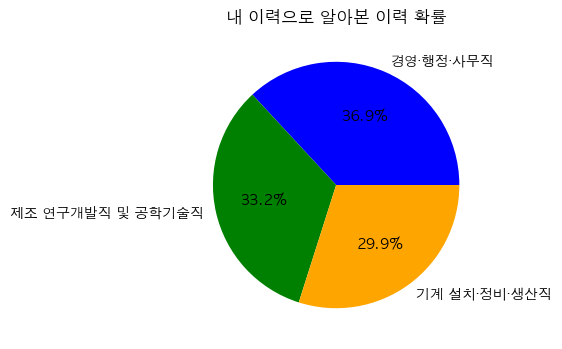

In [167]:
last_row_X = X.iloc[-1:].copy()

class_probabilities = model.predict_proba(last_row_X)
top_classes_indices = np.argsort(class_probabilities[0])[::-1][:3]

for index in top_classes_indices:
    class_label = model.classes_[index]
    probability = class_probabilities[0, index]
    print(f'{class_label}: {probability * 100:.2f}%')

# 시각화 (파이 차트)
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(class_probabilities[0, top_classes_indices] * 100, labels=model.classes_[top_classes_indices], autopct='%1.1f%%', colors=['blue', 'green', 'orange'])
ax.set_title('내 이력으로 알아본 이력 확률')

plt.show()
